In [69]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt


#import os
#print(os.listdir("../Datacamp-SupervisedLearning"))

# Read the CSV file into a DataFrame: df
df = pd.read_csv('../Datacamp-SupervisedLearning/dataset/diabetes.csv')
print(df.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### Explore the DataFrame using pandas methods

Column descriptions    
- Pregnancies: Number of times pregnant    
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test    
- BloodPressure: Diastolic blood pressure (mm Hg)    
- SkinThickness: Triceps skin fold thickness (mm)    
- Insulin: 2-Hour serum insulin (mu U/ml)    
- BMI: Body mass index (weight in kg/(height in m)^2)    
- DiabetesPedigreeFunction: Diabetes pedigree function    
- Age: Age (years)    
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0    

In [70]:
# show dataframe size
print('dataframe size is {} rows, {} columns'.format(df.shape[0], df.shape[1]))

dataframe size is 768 rows, 9 columns


In [71]:
df.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


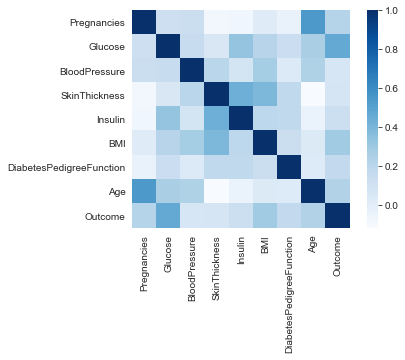

In [73]:
sns.heatmap(df.corr(), square=True, cmap='Blues');

#### Metrics for classification

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance

In [74]:
# Create arrays for features and target variable (outcome)

X = df.drop('Outcome', axis = 1)
y = df['Outcome'].values



In [75]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

#### Building a logistic regression model

In [76]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



#### Plotting an ROC curve
ROC - Receiver Operator Characteristic Curve    
ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

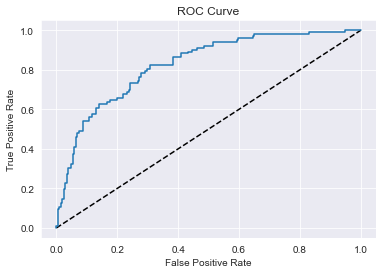

In [77]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This ROC curve provides a nice visual way to assess your classifier's performance 
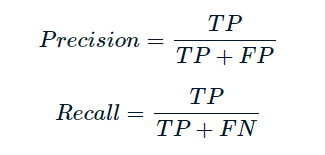

- The area under the ROC, commonly denoted as AUC, is another populat metric for classification models.
- Larger area under the ROC curve = better model
  -  area = 0.5 -> random split  (random guessing, only correct 50% of the time)
  -  area = 0.8 -> Good split
  -  area = 1   -> Perfect split

#### AUC computation

In [78]:
# Import necessary modules
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, scoring='roc_auc', cv=5)

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8260517799352751
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.87490566 0.83245283]


#### Hyperparameter tuning with GridSearchCV

Like the alpha parameter of lasso and ridge regularization, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what we will tune in this exercise. A large C can lead to an overfit model, while a small  can lead to an underfit model.

In [79]:
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734742381801205


#### Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [81]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3}
Best score is 0.7448858331211273


Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time

#### Hold-out set

The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

#### Hold-out set in practice I: Classification

In [82]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression( penalty='l1', solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))



Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7608695652173914


#### Hold-out set in practice II: Regression

In [83]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702734
Tuned ElasticNet MSE: 0.16664179543611005
